In [18]:
#Imorting liraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data_ts = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\04 - Data Cleaning\Marseille.csv')

In [20]:
data_ts.head()

,latitude,longitude,address,datetime,datetimeEpoch,tempmax,tempmin,temp,humidity,precip,...,conditions,description,date,pm25,pm10,o3,no2,so2,co,City
0,43.2934,5.37132,Marseille,2015-01-01,1420066800,9.2,0.1,4.2,72.63,0.2,...,"Rain, Partially cloudy",Clearing in the afternoon with early morning r...,2015-01-01,108.0,32.0,NaN,NaN,NaN,NaN,Marseille
1,43.2934,5.37132,Marseille,2015-01-02,1420153200,12.9,-1.3,6.1,63.60,0.2,...,Rain,Clear conditions throughout the day with after...,2015-01-02,83.0,14.0,NaN,NaN,NaN,NaN,Marseille
2,43.2934,5.37132,Marseille,2015-01-03,1420239600,15.6,8.1,11.5,70.49,0.0,...,Clear,Clear conditions throughout the day.,2015-01-03,49.0,10.0,NaN,NaN,NaN,NaN,Marseille
3,43.2934,5.37132,Marseille,2015-01-04,1420326000,16.1,8.9,12.3,64.23,0.0,...,Clear,Clear conditions throughout the day.,2015-01-04,33.0,31.0,NaN,NaN,NaN,NaN,Marseille
4,43.2934,5.37132,Marseille,2015-01-05,1420412400,13.0,0.9,5.9,74.32,0.0,...,Clear,Clear conditions throughout the day.,2015-01-05,70.0,45.0,NaN,NaN,NaN,NaN,Marseille


In [21]:
data_ts.columns

Index(['latitude', 'longitude', 'address', 'datetime', 'datetimeEpoch',
       'tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'precipcover',
       'snow', 'snowdepth', 'windgust', 'windspeed', 'pressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'conditions',
       'description', 'date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
       'City'],
      dtype='object')

In [22]:
data_ts.dtypes

latitude          float64
longitude         float64
address            object
datetime           object
datetimeEpoch       int64
tempmax           float64
tempmin           float64
temp              float64
humidity          float64
precip            float64
precipcover       float64
snow              float64
snowdepth         float64
windgust          float64
windspeed         float64
pressure          float64
cloudcover        float64
visibility        float64
solarradiation    float64
solarenergy       float64
uvindex           float64
conditions         object
description        object
date               object
pm25              float64
pm10              float64
o3                float64
no2               float64
so2               float64
co                float64
City               object
dtype: object

In [23]:
# For time series analysis I just need the date column and the columns with pollutions. I can drop all the rest 
data_ts =data_ts[['datetime', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']]

In [24]:
data_ts.head()

,datetime,pm25,pm10,o3,no2,so2,co
0,2015-01-01,108.0,32.0,NaN,NaN,NaN,NaN
1,2015-01-02,83.0,14.0,NaN,NaN,NaN,NaN
2,2015-01-03,49.0,10.0,NaN,NaN,NaN,NaN
3,2015-01-04,33.0,31.0,NaN,NaN,NaN,NaN
4,2015-01-05,70.0,45.0,NaN,NaN,NaN,NaN


In [25]:
data_ts.dtypes

datetime     object
pm25        float64
pm10        float64
o3          float64
no2         float64
so2         float64
co          float64
dtype: object

In [26]:
#I need to convert datetime to datetime object 

data_ts.datetime= pd.to_datetime(data_ts.datetime)

In [27]:
data_ts.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
so2                float64
co                 float64
dtype: object

In [28]:
data_ts.shape

(2557, 7)

Missing values

In [29]:
data_ts.isna().sum()


datetime       0
pm25         172
pm10         179
o3          2371
no2          537
so2         2458
co          2557
dtype: int64

In [30]:
# I will drop columns with two pollutants so2 and co as they have too much missing values, so they won't be useful for my analysis 
data_ts.drop(columns=['so2','o3','co','no2'], inplace=True)

In [31]:
# I'm looking for the columns with the missing values
nan = data_ts[data_ts['pm25'].isna()]
nan.head()

,datetime,pm25,pm10
65,2015-03-07,NaN,NaN
66,2015-03-08,NaN,NaN
67,2015-03-09,NaN,53.0
71,2015-03-13,NaN,NaN
72,2015-03-14,NaN,NaN


In [32]:
#I will fill empty values with the mean for each month, to do that I create a new column year-month thanks to which I will be able to calaculate a mean value for each month of each year
data_ts['year_month']=data_ts['datetime'].dt.to_period('M')

In [33]:
#Now I create new df with average values of all pollutants for each month
avg_year_months = data_ts.groupby('year_month').agg('mean')
avg_year_months

,pm25,pm10
year_month,,
2015-01,63.645161,24.419355
2015-02,73.892857,31.642857
2015-03,76.954545,31.095238
2015-04,59.900000,29.266667
2015-05,59.296296,28.642857
...,...,...
2021-08,42.290323,30.161290
2021-09,41.033333,27.733333
2021-10,42.379310,26.931034


In [34]:
#I need a polutant list as I will iterate through them
pollutants = avg_year_months.columns.tolist()
pollutants

['pm25', 'pm10']

In [36]:
# I am filling a missing values in data with average values of each pollutant in the same month and in the same year 
for i in range(len(pollutants)):
	for year_month in data_ts.year_month.unique():
		mean = avg_year_months.loc[year_month][i]
		data_ts.loc[data_ts.year_month==year_month, pollutants[i]] = data_ts.loc[data_ts.year_month==year_month, pollutants[i]].fillna(mean)

In [37]:
# There are still missing values. From the earlier observation I could see that there are 3 months in 2017 (July, August and September) for which there are no measurements
# I decided to fill these values with the mean of each day in 2016 and 2018, for example:
# value for 1st of July 2017 will be filled with the mean of values recorded on 1st of July 2016 and 2018 
data_ts.isna().sum()

datetime       0
pm25          61
pm10          61
year_month     0
dtype: int64

In [38]:
# I create additional columns to help me fill missing values
data_ts['year']=data_ts['datetime'].dt.year
data_ts['month_day'] = data_ts['datetime'].dt.strftime('%m-%d')

In [ ]:
# I am taking values only for 2 years 2016 and 2018
data16_18 = data_ts.loc[(data_ts['year']==2016) |(data_ts['year']==2018)]

In [ ]:
# I am creating a means for each month and day from values recorded in 2016 and 2018
averge_for_days = paris16_18.groupby('month_day').agg('mean')
averge_for_days

,pm25,pm10,o3,no2,year
month_day,,,,,
01-01,49.100000,24.5,21.000000,30.50,2017.0
01-02,49.000000,22.0,24.000000,26.00,2017.0
01-03,42.500000,24.0,21.000000,34.50,2017.0
01-04,42.000000,25.0,22.000000,39.00,2017.0
01-05,48.500000,29.0,17.000000,40.50,2017.0
...,...,...,...,...,...
12-27,97.500000,49.5,5.500000,42.00,2017.0
12-28,95.000000,53.5,4.500000,40.00,2017.0
12-29,106.000000,47.0,7.500000,41.50,2017.0


In [ ]:
# Now I can fill missing values thanks to the df above and the pollutant list
for i in range(len(pollutants)):
	for month_day in paris_ts.month_day.unique():
		mean = averge_for_days.loc[month_day][i]
		paris_ts.loc[(paris_ts.month_day==month_day) & (paris_ts.year==2017), pollutants[i]] = paris_ts.loc[(paris_ts.month_day==month_day) & (paris_ts.year==2017), pollutants[i]].fillna(mean)

In [ ]:
# It looks like I was able to fill all of the missing values
paris_ts.isna().sum()

datetime      0
pm25          0
pm10          0
o3            0
no2           0
year_month    0
year          0
month_day     0
dtype: int64

In [ ]:
#I'm checking if the values were filled correctly --> They were :)
paris_ts[paris_ts.month_day=='07-01']

,datetime,pm25,pm10,o3,no2,year_month,year,month_day
181,2014-07-01,62.0,40.0,42.0,59.0,2014-07,2014,07-01
546,2015-07-01,81.0,56.0,44.0,57.0,2015-07,2015,07-01
912,2016-07-01,35.0,24.0,22.0,27.0,2016-07,2016,07-01
1277,2017-07-01,51.5,37.5,39.0,43.5,2017-07,2017,07-01
1642,2018-07-01,68.0,51.0,56.0,60.0,2018-07,2018,07-01
2007,2019-07-01,44.0,39.0,38.0,35.0,2019-07,2019,07-01
2373,2020-07-01,36.0,17.0,23.0,23.0,2020-07,2020,07-01
2738,2021-07-01,53.0,37.0,37.0,38.0,2021-07,2021,07-01


In [ ]:
# I am dropping the columns which I won't need anymore and which were used only to fill missing values
paris_ts.drop(columns=['year_month', 'year', 'month_day'], inplace=True)

Outliers

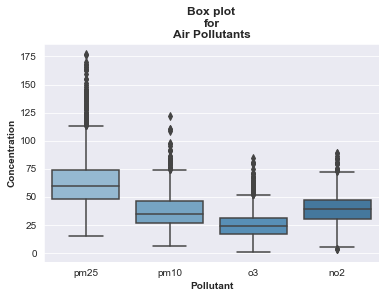

In [ ]:
# I am checking for the outliers by plooting box plot
sns.set_palette("Blues_d")
sns.set_style('darkgrid')
sns.boxplot(data=paris_ts)
plt.title('Box plot\nfor\nAir Pollutants', fontweight='bold')
plt.ylabel('Concentration', fontweight='bold')
plt.xlabel('Pollutant', fontweight='bold')
plt.show()

In [ ]:
paris_ts.describe()

,pm25,pm10,o3,no2
count,2922.000000,2922.000000,2922.000000,2922.000000
mean,63.779860,37.313246,24.908479,38.463754
std,22.347357,14.415868,11.732745,13.013070
min,15.000000,6.000000,1.000000,4.000000
25%,48.000000,27.000000,17.000000,30.000000
50%,60.000000,35.000000,24.000000,39.000000
75%,74.000000,46.000000,31.000000,47.000000
max,177.000000,122.000000,85.000000,89.000000


Saving file for further analysis 

In [ ]:
paris_ts.to_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Paris_clean_for_ts.csv', index_label=False)